# Taiwan

Data after processing:
                   Negara  Jumlah_Ekspor  Harga_Internasional  Dummy_COVID  \
Date                                                                         
2012-01-01  Korea Selatan        28692.4               2393.2            0   
2013-01-01  Korea Selatan        27947.2               1997.3            0   
2014-01-01  Korea Selatan        27018.3               1724.7            0   
2015-01-01  Korea Selatan        24088.1               1284.8            0   
2016-01-01  Korea Selatan        20289.5                952.1            0   

           Unnamed: 5  Unnamed: 6  
Date                               
2012-01-01  28,692.40         NaN  
2013-01-01  27,947.20         NaN  
2014-01-01  27,018.30         NaN  
2015-01-01  24,088.10         NaN  
2016-01-01  20,289.50         NaN  

Descriptive Statistics:
       Jumlah_Ekspor  Harga_Internasional  Dummy_COVID  Unnamed: 6
count      12.000000            12.000000    12.000000         0.0
mean    20873.17500

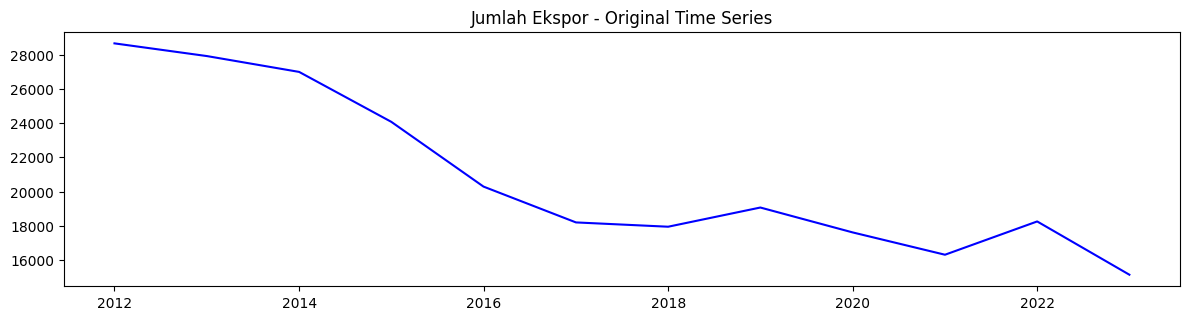


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1976  , p=0.6684  , df_denom=8, df_num=1
ssr based chi2 test:   chi2=0.2718  , p=0.6022  , df=1
likelihood ratio test: chi2=0.2685  , p=0.6044  , df=1
parameter F test:         F=0.1976  , p=0.6684  , df_denom=8, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.4492  , p=0.6616  , df_denom=5, df_num=2
ssr based chi2 test:   chi2=1.7968  , p=0.4072  , df=2
likelihood ratio test: chi2=1.6524  , p=0.4377  , df=2
parameter F test:         F=0.4492  , p=0.6616  , df_denom=5, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.9533  , p=0.5486  , df_denom=2, df_num=3
ssr based chi2 test:   chi2=12.8701 , p=0.0049  , df=3
likelihood ratio test: chi2=7.9911  , p=0.0462  , df=3
parameter F test:         F=0.9533  , p=0.5486  , df_denom=2, df_num=3
Correlation matrix:
                     Jumlah_Ekspor  Harga_Internasional  Dummy_COVID  \
Jumlah_Ekspor 

c:\Users\bayuk\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\bayuk\AppData\Local\Temp\ipykernel_27292\7840531.py:80: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()
c:\Users\bayuk\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\bayuk\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... contin

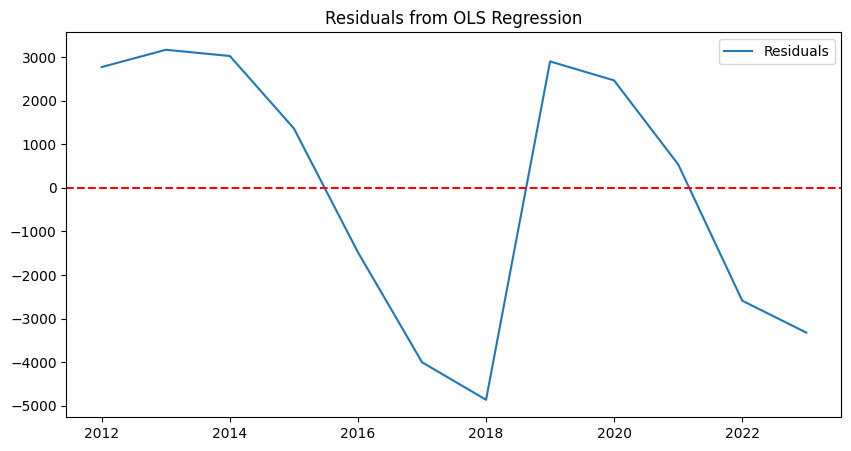

In [6]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from statsmodels.tsa.vector_ar.var_model import VAR
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.regression.linear_model import OLS

# Load Data
data = pd.read_csv('Taiwan.csv')

# Preprocessing
data['Date'] = pd.to_datetime(data['Date'], format='%Y')  # Format tanggal
data.set_index('Date', inplace=True)  # Set Date as index
data = data.sort_index()  # Sort berdasarkan waktu

# Bersihkan data numerik
data['Jumlah_Ekspor'] = data['Jumlah_Ekspor'].replace(',', '', regex=True).astype(float)
data['Harga_Internasional'] = data['Harga_Internasional'].replace(',', '', regex=True).astype(float)

# Buat kolom Dummy COVID jika belum ada
if 'Dummy_COVID' not in data.columns:
    data['Dummy_COVID'] = (data.index.year >= 2020).astype(int)

# Descriptive Statistics
print("Data after processing:")
print(data.head())
print("\nDescriptive Statistics:")
print(data.describe())

# 4.2.1 Uji Stasioneritas
def adf_test(series, column_name):
    result = adfuller(series.dropna())  # ADF Test
    print(f"\nADF Test for {column_name}:")
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    print(f"Critical Values: {result[4]}")
    if result[1] <= 0.05:
        print(f"{column_name} is stationary.")
    else:
        print(f"{column_name} is not stationary.")
    print("-" * 50)

# Check stationarity for 'Jumlah_Ekspor' and 'Harga_Internasional'
adf_test(data['Jumlah_Ekspor'], 'Jumlah Ekspor')
adf_test(data['Harga_Internasional'], 'Harga Internasional')

# Check if series is stationary, and apply differencing if necessary
adf_result = adfuller(data['Jumlah_Ekspor'].dropna())  # ADF Test for 'Jumlah_Ekspor'
if adf_result[1] > 0.05:  # If p-value is greater than 0.05, series is not stationary
    data['Jumlah_Ekspor_Diff'] = data['Jumlah_Ekspor'].diff().dropna()
    adf_test(data['Jumlah_Ekspor_Diff'], 'Jumlah Ekspor (Differenced)')  # Apply ADF test on differenced series
else:
    print("Jumlah Ekspor is already stationary.")

# Optionally, plot time series before and after differencing
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(data['Jumlah_Ekspor'], label='Jumlah Ekspor', color='blue')
plt.title('Jumlah Ekspor - Original Time Series')

# Ensure 'Jumlah_Ekspor_Diff' exists before plotting
if 'Jumlah_Ekspor_Diff' in data.columns:
    plt.subplot(2, 1, 2)
    plt.plot(data['Jumlah_Ekspor_Diff'], label='Jumlah Ekspor - Differenced', color='orange')
    plt.title('Jumlah Ekspor - Differenced Time Series')
else:
    print("Differenced series does not exist, skipping the plot.")

plt.tight_layout()
plt.show()


# 4.2.2 Uji Kointegrasi (Angle Granger Test)
# Melakukan uji Granger Causality antara 'Jumlah_Ekspor' dan 'Harga_Internasional'
gc_test = grangercausalitytests(data[['Jumlah_Ekspor', 'Harga_Internasional']], maxlag=3, verbose=True)

# 4.2.3 Hubungan Jangka Pendek (VAR)
# Check for multicollinearity issues (highly correlated variables)
correlation_matrix = data.corr()
print("Correlation matrix:")
print(correlation_matrix)

model_var = VAR(data[['Jumlah_Ekspor', 'Harga_Internasional']])
model_var_fitted = model_var.fit(maxlags=3)  # Adjust the number of lags as necessary
print("\nVAR Model Summary:")
print(model_var_fitted.summary())

# Conduct Granger Causality Test
granger_results = model_var_fitted.test_causality(causing='Jumlah_Ekspor', caused='Harga_Internasional', kind='f')
print("\nGranger Causality Results:")
print(granger_results.summary())

# 4.2.4 Hubungan Jangka Panjang (OLS)
X = sm.add_constant(data[['Harga_Internasional', 'Dummy_COVID']])
Y = data['Jumlah_Ekspor']
ols_model = OLS(Y, X).fit()
print("\nOLS Regression Results:")
print(ols_model.summary())

# Plot Residuals
residuals = ols_model.resid
plt.figure(figsize=(10, 5))
plt.plot(residuals, label='Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals from OLS Regression')
plt.legend()
plt.show()



# Jepang

Data after processing:
            Negara  Jumlah_Ekspor  Harga_Internasional  Dummy_COVID
Date                                                               
2012-01-01  Jepang        35068.2               3558.9            0
2013-01-01  Jepang        37711.5               3225.1            0
2014-01-01  Jepang        35579.3               2593.5            0
2015-01-01  Jepang        32503.5               2033.7            0
2016-01-01  Jepang        33037.8               1980.1            0

Descriptive Statistics:
       Jumlah_Ekspor  Harga_Internasional  Dummy_COVID
count      12.000000            12.000000    12.000000
mean    30341.300000          3099.191667     0.416667
std      4575.593775          1524.434983     0.514929
min     22978.400000          1695.700000     0.000000
25%     26822.050000          2258.250000     0.000000
50%     30072.150000          2567.150000     0.000000
75%     33545.400000          3308.550000     1.000000
max     37711.500000          7174.7

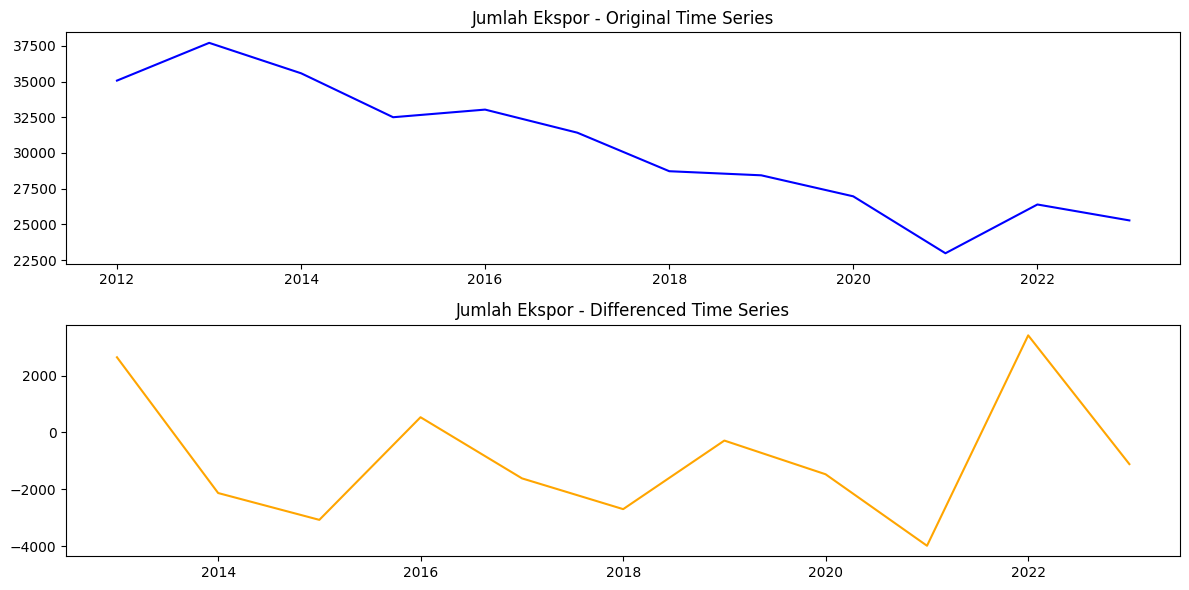

c:\Users\bayuk\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\bayuk\AppData\Local\Temp\ipykernel_21836\915800066.py:69: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()
c:\Users\bayuk\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\bayuk\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... cont


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0648  , p=0.8055  , df_denom=8, df_num=1
ssr based chi2 test:   chi2=0.0891  , p=0.7653  , df=1
likelihood ratio test: chi2=0.0887  , p=0.7658  , df=1
parameter F test:         F=0.0648  , p=0.8055  , df_denom=8, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.3080  , p=0.7480  , df_denom=5, df_num=2
ssr based chi2 test:   chi2=1.2318  , p=0.5401  , df=2
likelihood ratio test: chi2=1.1617  , p=0.5594  , df=2
parameter F test:         F=0.3080  , p=0.7480  , df_denom=5, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.2033  , p=0.4838  , df_denom=2, df_num=3
ssr based chi2 test:   chi2=16.2451 , p=0.0010  , df=3
likelihood ratio test: chi2=9.2827  , p=0.0258  , df=3
parameter F test:         F=1.2033  , p=0.4838  , df_denom=2, df_num=3
Correlation matrix:
                     Jumlah_Ekspor  Harga_Internasional  Dummy_COVID  \
Jumlah_Ekspor 

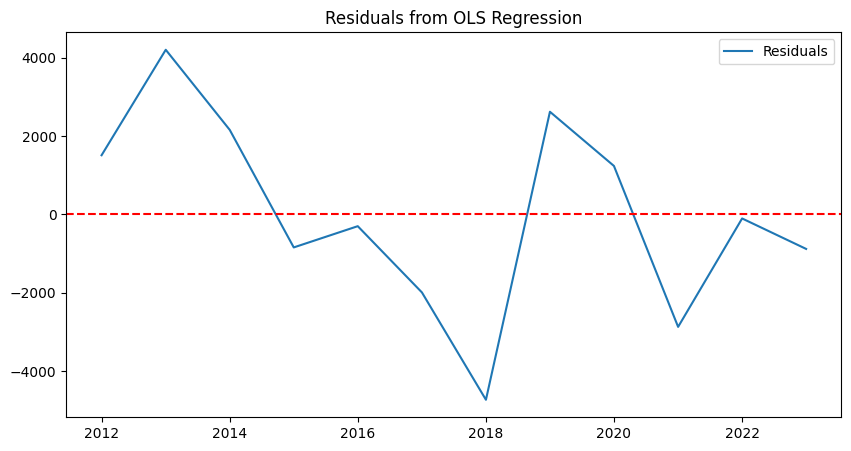

In [27]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from statsmodels.tsa.vector_ar.var_model import VAR
from statsmodels.tsa.stattools import grangercausalitytests

# Load Data
data = pd.read_csv('Jepang.csv')

# Preprocessing
data['Date'] = pd.to_datetime(data['Date'], format='%Y')  # Format tanggal
data.set_index('Date', inplace=True)  # Set Date as index
data = data.sort_index()  # Sort berdasarkan waktu

# Bersihkan data numerik
data['Jumlah_Ekspor'] = data['Jumlah_Ekspor'].replace(',', '', regex=True).astype(float)
data['Harga_Internasional'] = data['Harga_Internasional'].replace(',', '', regex=True).astype(float)

# Buat kolom Dummy COVID jika belum ada
if 'Dummy_COVID' not in data.columns:
    data['Dummy_COVID'] = (data.index.year >= 2020).astype(int)

# Descriptive Statistics
print("Data after processing:")
print(data.head())
print("\nDescriptive Statistics:")
print(data.describe())

# 4.2.1 Uji Stasioneritas
def adf_test(series, column_name):
    result = adfuller(series.dropna())  # ADF Test
    print(f"\nADF Test for {column_name}:")
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    print(f"Critical Values: {result[4]}")
    if result[1] <= 0.05:
        print(f"{column_name} is stationary.")
    else:
        print(f"{column_name} is not stationary.")
    print("-" * 50)

# Check stationarity for 'Jumlah_Ekspor' and 'Harga_Internasional'
adf_test(data['Jumlah_Ekspor'], 'Jumlah Ekspor')
adf_test(data['Harga_Internasional'], 'Harga Internasional')

# Uji Differencing if series is not stationary
if adfuller(data['Jumlah_Ekspor'].dropna())[1] > 0.05:
    data['Jumlah_Ekspor_Diff'] = data['Jumlah_Ekspor'].diff().dropna()
    adf_test(data['Jumlah_Ekspor_Diff'], 'Jumlah Ekspor (Differenced)')

# Optionally, plot time series before and after differencing
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(data['Jumlah_Ekspor'], label='Jumlah Ekspor', color='blue')
plt.title('Jumlah Ekspor - Original Time Series')
plt.subplot(2, 1, 2)
plt.plot(data['Jumlah_Ekspor_Diff'], label='Jumlah Ekspor - Differenced', color='orange')
plt.title('Jumlah Ekspor - Differenced Time Series')
plt.tight_layout()
plt.show()

# 4.2.2 Uji Kointegrasi (Angle Granger Test)
# Melakukan uji Granger Causality antara 'Jumlah_Ekspor' dan 'Harga_Internasional'
gc_test = grangercausalitytests(data[['Jumlah_Ekspor', 'Harga_Internasional']], maxlag=3, verbose=True)

# 4.2.3 Hubungan Jangka Pendek (VAR)
# Check for multicollinearity issues (highly correlated variables)
correlation_matrix = data.corr()
print("Correlation matrix:")
print(correlation_matrix)

model_var = VAR(data[['Jumlah_Ekspor', 'Harga_Internasional']])
model_var_fitted = model_var.fit(maxlags=3)  # Adjust the number of lags as necessary
print("\nVAR Model Summary:")
print(model_var_fitted.summary())

# Conduct Granger Causality Test
granger_results = model_var_fitted.test_causality(causing='Jumlah_Ekspor', caused='Harga_Internasional', kind='f')
print("\nGranger Causality Results:")
print(granger_results.summary())

# 4.2.4 Hubungan Jangka Panjang (OLS)
X = sm.add_constant(data[['Harga_Internasional', 'Dummy_COVID']])
Y = data['Jumlah_Ekspor']
ols_model = OLS(Y, X).fit()
print("\nOLS Regression Results:")
print(ols_model.summary())

# Plot Residuals
residuals = ols_model.resid
plt.figure(figsize=(10, 5))
plt.plot(residuals, label='Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals from OLS Regression')
plt.legend()
plt.show()



## Korea Selatan

Data after processing:
                   Negara  Jumlah_Ekspor  Harga_Internasional  Dummy_COVID  \
Date                                                                         
2012-01-01  Korea Selatan        37899.1               2545.2            0   
2013-01-01  Korea Selatan        36149.6               2061.8            0   
2014-01-01  Korea Selatan        35574.1               1874.4            0   
2015-01-01  Korea Selatan        33037.3               1377.4            0   
2016-01-01  Korea Selatan        34943.2               1200.9            0   

            Unnamed: 5  
Date                    
2012-01-01         NaN  
2013-01-01         NaN  
2014-01-01         NaN  
2015-01-01         NaN  
2016-01-01         NaN  

Descriptive Statistics:
       Jumlah_Ekspor  Harga_Internasional  Dummy_COVID  Unnamed: 5
count      12.000000            12.000000    12.000000         0.0
mean    31610.866667          1824.225000     0.416667         NaN
std      6011.638458         

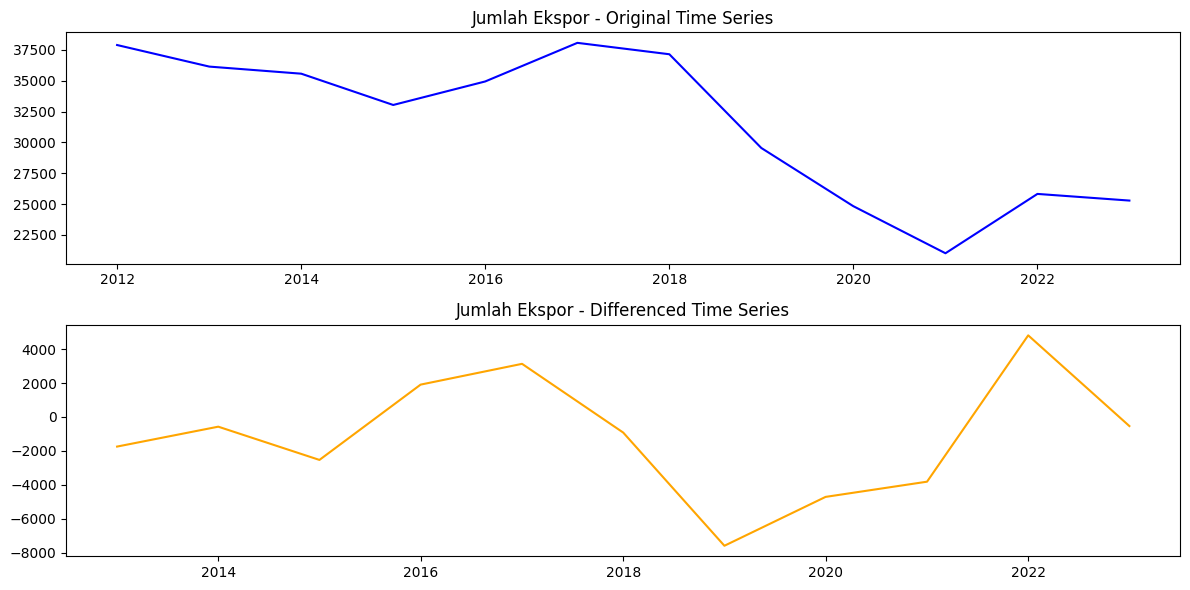


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1333  , p=0.7245  , df_denom=8, df_num=1
ssr based chi2 test:   chi2=0.1833  , p=0.6685  , df=1
likelihood ratio test: chi2=0.1818  , p=0.6698  , df=1
parameter F test:         F=0.1333  , p=0.7245  , df_denom=8, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.3609  , p=0.3374  , df_denom=5, df_num=2
ssr based chi2 test:   chi2=5.4438  , p=0.0657  , df=2
likelihood ratio test: chi2=4.3462  , p=0.1138  , df=2
parameter F test:         F=1.3609  , p=0.3374  , df_denom=5, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=37.8136 , p=0.0259  , df_denom=2, df_num=3
ssr based chi2 test:   chi2=510.4841, p=0.0000  , df=3
likelihood ratio test: chi2=36.5005 , p=0.0000  , df=3
parameter F test:         F=37.8136 , p=0.0259  , df_denom=2, df_num=3
Correlation matrix:
                     Jumlah_Ekspor  Harga_Internasional  Dummy_COVID  \
Jumlah_Ekspor 

c:\Users\bayuk\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\bayuk\AppData\Local\Temp\ipykernel_27292\4043223607.py:80: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()
c:\Users\bayuk\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\bayuk\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... con

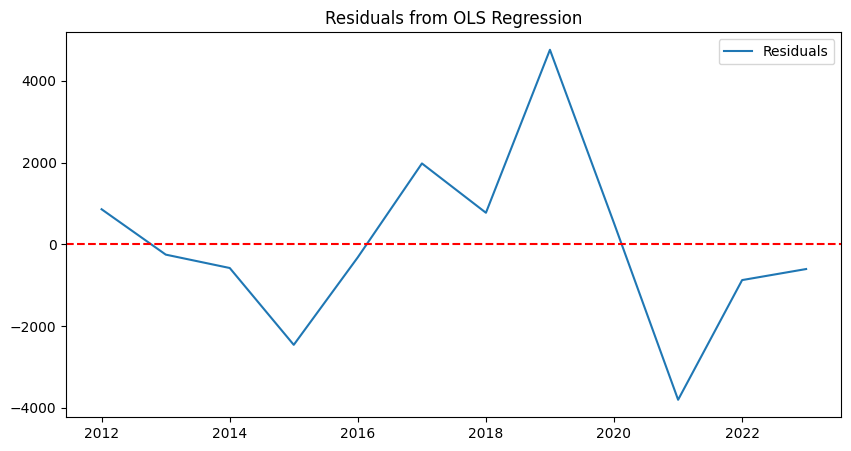

In [7]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from statsmodels.tsa.vector_ar.var_model import VAR
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.regression.linear_model import OLS

# Load Data
data = pd.read_csv('Korea Selatan.csv')

# Preprocessing
data['Date'] = pd.to_datetime(data['Date'], format='%Y')  # Format tanggal
data.set_index('Date', inplace=True)  # Set Date as index
data = data.sort_index()  # Sort berdasarkan waktu

# Bersihkan data numerik
data['Jumlah_Ekspor'] = data['Jumlah_Ekspor'].replace(',', '', regex=True).astype(float)
data['Harga_Internasional'] = data['Harga_Internasional'].replace(',', '', regex=True).astype(float)

# Buat kolom Dummy COVID jika belum ada
if 'Dummy_COVID' not in data.columns:
    data['Dummy_COVID'] = (data.index.year >= 2020).astype(int)

# Descriptive Statistics
print("Data after processing:")
print(data.head())
print("\nDescriptive Statistics:")
print(data.describe())

# 4.2.1 Uji Stasioneritas
def adf_test(series, column_name):
    result = adfuller(series.dropna())  # ADF Test
    print(f"\nADF Test for {column_name}:")
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    print(f"Critical Values: {result[4]}")
    if result[1] <= 0.05:
        print(f"{column_name} is stationary.")
    else:
        print(f"{column_name} is not stationary.")
    print("-" * 50)

# Check stationarity for 'Jumlah_Ekspor' and 'Harga_Internasional'
adf_test(data['Jumlah_Ekspor'], 'Jumlah Ekspor')
adf_test(data['Harga_Internasional'], 'Harga Internasional')

# Check if series is stationary, and apply differencing if necessary
adf_result = adfuller(data['Jumlah_Ekspor'].dropna())  # ADF Test for 'Jumlah_Ekspor'
if adf_result[1] > 0.05:  # If p-value is greater than 0.05, series is not stationary
    data['Jumlah_Ekspor_Diff'] = data['Jumlah_Ekspor'].diff().dropna()
    adf_test(data['Jumlah_Ekspor_Diff'], 'Jumlah Ekspor (Differenced)')  # Apply ADF test on differenced series
else:
    print("Jumlah Ekspor is already stationary.")

# Optionally, plot time series before and after differencing
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(data['Jumlah_Ekspor'], label='Jumlah Ekspor', color='blue')
plt.title('Jumlah Ekspor - Original Time Series')

# Ensure 'Jumlah_Ekspor_Diff' exists before plotting
if 'Jumlah_Ekspor_Diff' in data.columns:
    plt.subplot(2, 1, 2)
    plt.plot(data['Jumlah_Ekspor_Diff'], label='Jumlah Ekspor - Differenced', color='orange')
    plt.title('Jumlah Ekspor - Differenced Time Series')
else:
    print("Differenced series does not exist, skipping the plot.")

plt.tight_layout()
plt.show()


# 4.2.2 Uji Kointegrasi (Angle Granger Test)
# Melakukan uji Granger Causality antara 'Jumlah_Ekspor' dan 'Harga_Internasional'
gc_test = grangercausalitytests(data[['Jumlah_Ekspor', 'Harga_Internasional']], maxlag=3, verbose=True)

# 4.2.3 Hubungan Jangka Pendek (VAR)
# Check for multicollinearity issues (highly correlated variables)
correlation_matrix = data.corr()
print("Correlation matrix:")
print(correlation_matrix)

model_var = VAR(data[['Jumlah_Ekspor', 'Harga_Internasional']])
model_var_fitted = model_var.fit(maxlags=3)  # Adjust the number of lags as necessary
print("\nVAR Model Summary:")
print(model_var_fitted.summary())

# Conduct Granger Causality Test
granger_results = model_var_fitted.test_causality(causing='Jumlah_Ekspor', caused='Harga_Internasional', kind='f')
print("\nGranger Causality Results:")
print(granger_results.summary())

# 4.2.4 Hubungan Jangka Panjang (OLS)
X = sm.add_constant(data[['Harga_Internasional', 'Dummy_COVID']])
Y = data['Jumlah_Ekspor']
ols_model = OLS(Y, X).fit()
print("\nOLS Regression Results:")
print(ols_model.summary())

# Plot Residuals
residuals = ols_model.resid
plt.figure(figsize=(10, 5))
plt.plot(residuals, label='Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals from OLS Regression')
plt.legend()
plt.show()

